<a href="https://colab.research.google.com/github/IAMKK28-03-04/Kushal/blob/main/Assignment09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
print(df)

                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individ

wcss: [1461784421318551.8, 594565061155039.8, 309997756190451.4, 196276794387697.62, 133974554630652.02, 101167802300639.47, 70408004369932.98, 55058680223300.836, 44296110941024.25, 35064519059441.242]


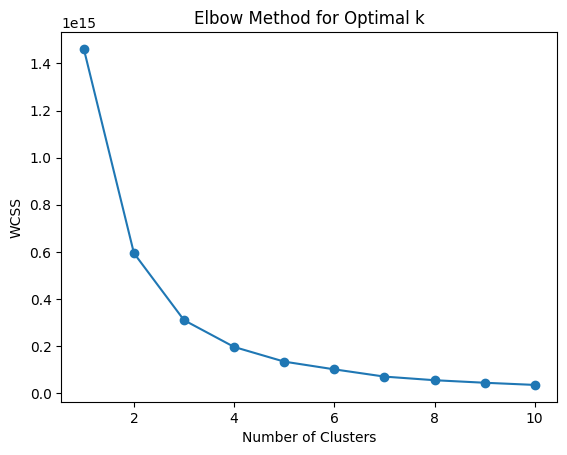

Silhouette scores : [0.8474014735548279, 0.6007219438374872, 0.5828511510116151, 0.5778566708790926, 0.5789669073235154, 0.5161710230798857, 0.5000635417633716, 0.5009599119939759, 0.4676340542535466]


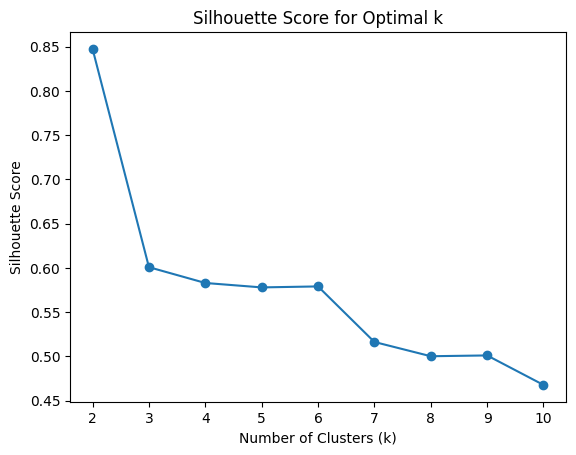

gap_statistics: [6305.337938542045, 8057.0513321176395, 9309.218270994574, 10664.10606916903, 11510.310664232766, 14252.582977166428, 15627.500504121508, 16560.31144729674, 19284.025254462224]


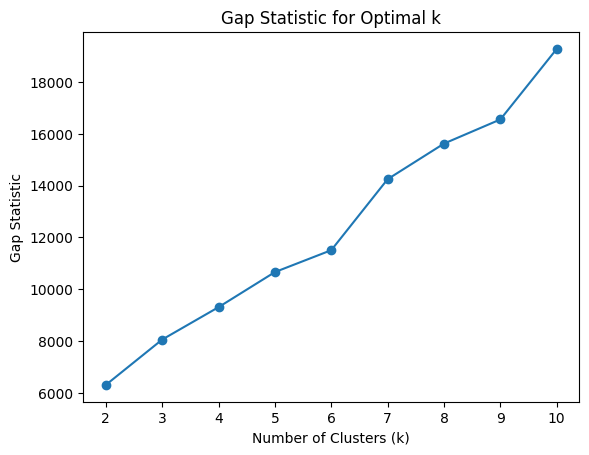

Cross-validation scores: [0.30836405 0.29558996 0.29830826 0.27626595 0.22335768]
Average cross-validation score: 0.28037717925021316


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

X = df[['selling_price', 'km_driven']]
y = df['year']

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print("wcss:",wcss)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
print("Silhouette scores :", silhouette_scores)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

gap_statistics = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    gap_statistics.append(calinski_harabasz_score(X, labels))
print("gap_statistics:", gap_statistics)

plt.plot(range(2, 11), gap_statistics, marker='o')
plt.title('Gap Statistic for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

In [ ]:
from sklearn.metrics import pairwise_distances

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
inertia = kmeans.inertia_
print("Inertia:", inertia)

clusters = [X[labels == i] for i in range(kmeans.n_clusters)]
dunn_index_value = dunn_index(clusters)
print("Dunn Index:", dunn_index_value)

Inertia: 3661.5501705848847
Dunn Index: 0.011934279281209966


      principal component 1  principal component 2
0                 -0.600252              -0.485504
1                 -0.205349              -0.697056
2                 -0.395025               0.629405
3                 -0.004133              -0.617131
4                 -1.199993               1.067668
...                     ...                    ...
4335              -0.324045               0.093930
4336              -0.324045               0.093930
4337              -0.736233              -0.227289
4338               0.080511               0.801714
4339               0.056276              -0.738658

[4340 rows x 2 columns]


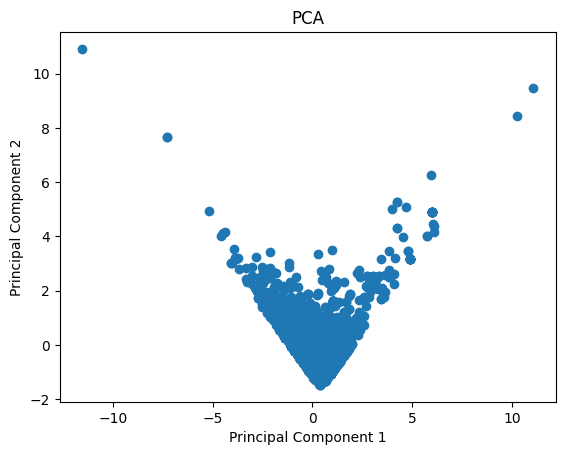

      tsne component 1  tsne component 2
0           -48.953125        -36.607162
1           -11.366657        -58.372730
2           -19.114492         28.092272
3             6.014848        -49.585476
4            -3.231648         56.707275
...                ...               ...
4335        -23.956091          0.430065
4336        -23.956091          0.430065
4337        -57.916080         -9.550372
4338         -4.195661         19.583122
4339         15.534789        -50.396580

[4340 rows x 2 columns]


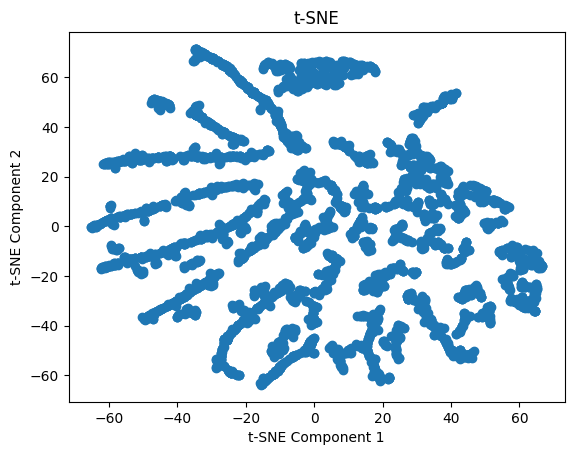

      lda component 1  lda component 2
0           -0.635201         0.585004
1           -0.157550         0.791415
2           -0.524818        -0.671725
3            0.064703         0.687545
4           -1.499251        -1.100309
...               ...              ...
4335        -0.382981        -0.080662
4336        -0.382981        -0.080662
4337        -0.820537         0.307500
4338         0.002301        -0.898739
4339         0.147805         0.818415

[4340 rows x 2 columns]


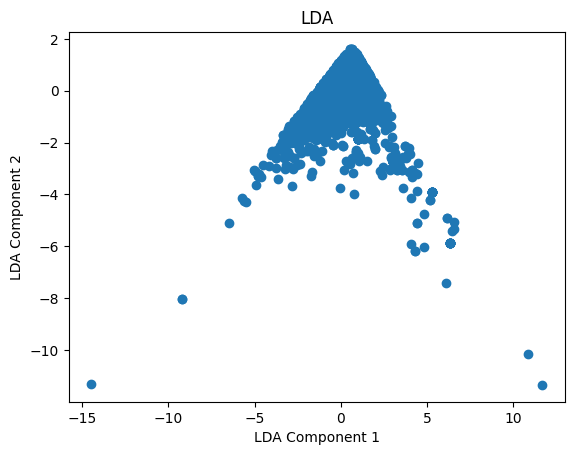

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt


X = df[['selling_price', 'km_driven']]
y = df['year']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(x)
tsne_df = pd.DataFrame(data = tsne_results, columns = ['tsne component 1', 'tsne component 2'])
print(tsne_df)
plt.scatter(tsne_df['tsne component 1'], tsne_df['tsne component 2'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE')
plt.show()

lda = LDA(n_components=2)
lda_results = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data = lda_results, columns = ['lda component 1', 'lda component 2'])
print(lda_df)
plt.scatter(lda_df['lda component 1'], lda_df['lda component 2'])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/world cup matches - Sheet1.csv')
print(data)

     Year             Datetime                     Stage              Stadium  \
0    1930  13 Jul 1930 - 15:00                   Group 1              Pocitos   
1    1930  13 Jul 1930 - 15:00                   Group 4       Parque Central   
2    1930  14 Jul 1930 - 12:45                   Group 2       Parque Central   
3    1930  14 Jul 1930 - 14:50                   Group 3              Pocitos   
4    1930  15 Jul 1930 - 16:00                   Group 1       Parque Central   
..    ...                  ...                       ...                  ...   
847  2014  05 Jul 2014 - 17:00            Quarter-finals     Arena Fonte Nova   
848  2014  08 Jul 2014 - 17:00               Semi-finals     Estadio Mineirao   
849  2014  09 Jul 2014 - 17:00               Semi-finals   Arena de Sao Paulo   
850  2014  12 Jul 2014 - 17:00  Play-off for third place     Estadio Nacional   
851  2014  13 Jul 2014 - 16:00                     Final  Estadio do Maracana   

    Home Team Name  Home Te

wcss: [3213.1525821596197, 1809.093437215645, 1281.7066790913884, 920.5568410773874, 800.6184419740692, 646.9083121088934, 553.4316425160574, 497.23426090224024, 418.67474593578504, 379.32270236906896]


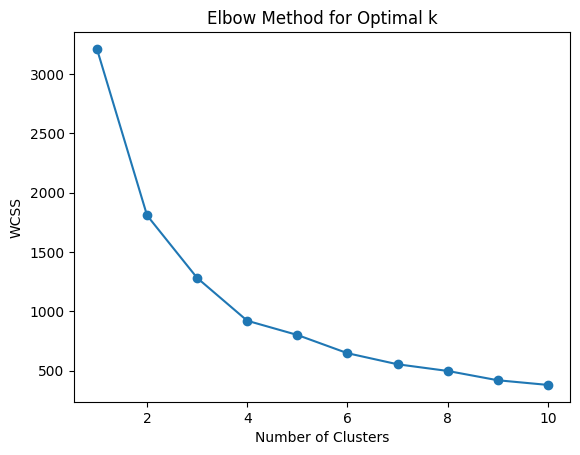

Silhouette scores : [0.38894398447185174, 0.37741119860118894, 0.4341838542780793, 0.4033630052604706, 0.4089499499955894, 0.47254641961220606, 0.46454817947088733, 0.5559949781829088, 0.5771177126421704]


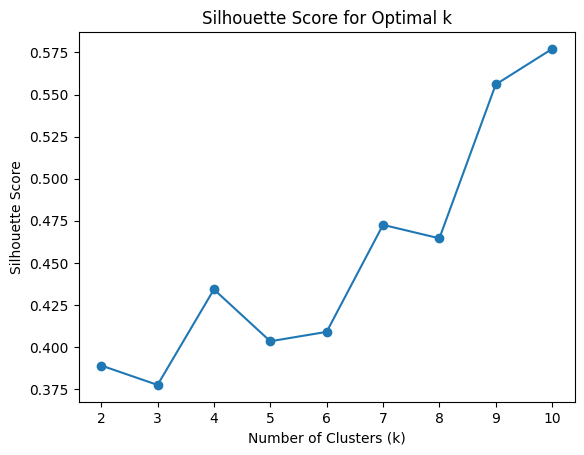

gap_statistics: [547.6167742507083, 560.8632798887106, 661.8193880972564, 638.0743652677885, 594.0792404144211, 676.8267964649355, 573.6607215159182, 659.5895018523757, 653.9046368500725]


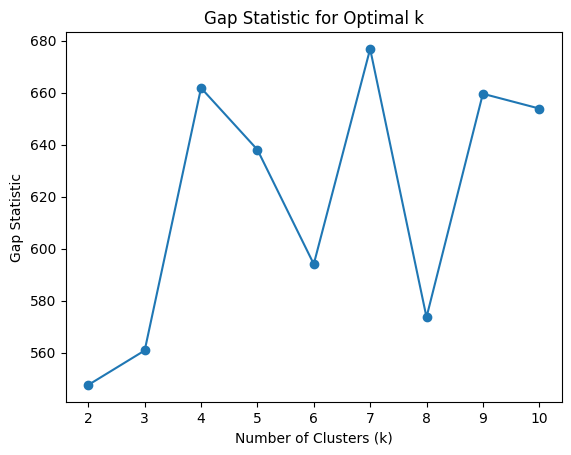

Cross-validation scores: [0.34237697 0.55386871 0.54049123 0.4873035  0.58260208]
Average cross-validation score: 0.5013284982881194


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data=pd.read_csv('/content/world cup matches - Sheet1.csv')

X = data[['Home Team Goals', 'Away Team Goals']]
y=data['Half-time Home Goals']

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print("wcss:",wcss)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))
print("Silhouette scores :", silhouette_scores)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

gap_statistics = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    gap_statistics.append(calinski_harabasz_score(X, labels))
print("gap_statistics:", gap_statistics)

plt.plot(range(2, 11), gap_statistics, marker='o')
plt.title('Gap Statistic for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
inertia = kmeans.inertia_
print("Inertia:", inertia)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
clusters = [X[labels == i] for i in range(kmeans.n_clusters)]
dunn_index_value = dunn_index(clusters)
print("Dunn Index:", dunn_index_value)

Inertia: 309997756190451.4
Dunn Index: 0.0007610466629044238


     principal component 1  principal component 2
0                 2.188359              -0.056197
1                 1.172993              -1.040591
2                 0.188599              -0.025224
3                 1.188479              -0.040711
4                -0.826767              -1.009618
..                     ...                    ...
847              -1.826647              -0.994131
848              -0.718363               5.989543
849              -1.826647              -0.994131
850              -1.780188               2.005509
851              -0.826767              -1.009618

[852 rows x 2 columns]


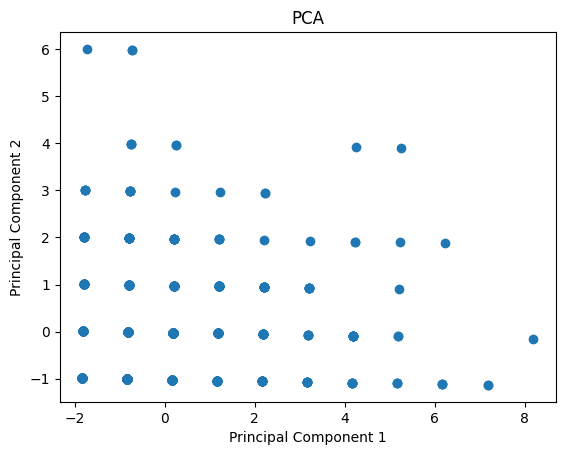

     tsne component 1  tsne component 2
0           28.451225        -26.720900
1          102.690201       -228.356110
2          219.539581        -14.883431
3          -83.205910       -116.313873
4          -74.159508       -214.244171
..                ...               ...
847       -224.162643        -57.057446
848        118.651978        237.416122
849       -224.162643        -57.057446
850         24.091177        259.860291
851        -74.159508       -214.244171

[852 rows x 2 columns]


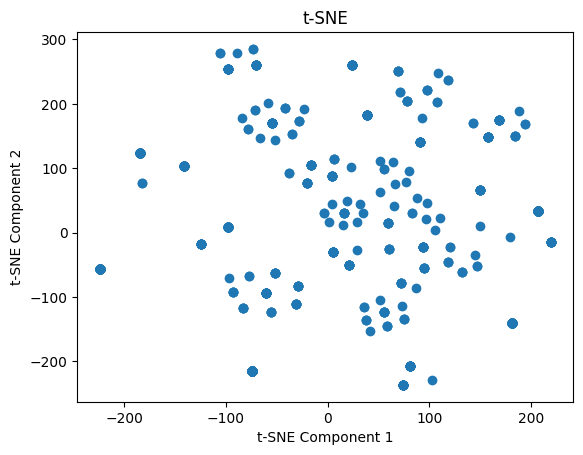

     lda component 1  lda component 2
0           1.989393        -0.003749
1           1.114307        -0.942865
2           0.172419        -0.019300
3           1.080906        -0.011524
4          -0.702667        -0.958416
..               ...              ...
847        -1.611154        -0.966192
848        -0.936474         5.560966
849        -1.611154        -0.966192
850        -1.711357         1.827829
851        -0.702667        -0.958416

[852 rows x 2 columns]


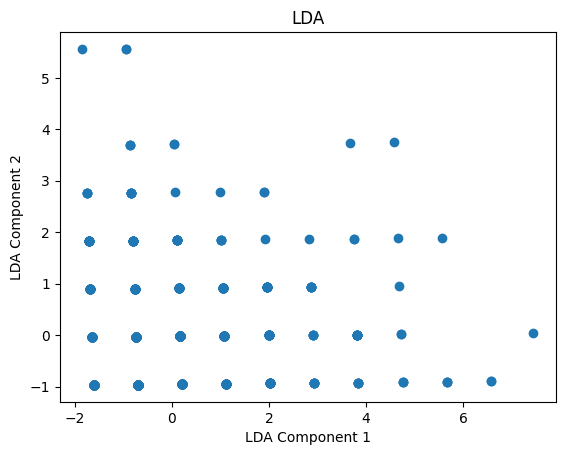

In [ ]:
x = data[['Home Team Goals', 'Away Team Goals']]
y = data['Half-time Home Goals']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(x)
tsne_df = pd.DataFrame(data = tsne_results, columns = ['tsne component 1', 'tsne component 2'])
print(tsne_df)
plt.scatter(tsne_df['tsne component 1'], tsne_df['tsne component 2'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE')
plt.show()

lda = LDA(n_components=2)
lda_results = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data = lda_results, columns = ['lda component 1', 'lda component 2'])
print(lda_df)
plt.scatter(lda_df['lda component 1'], lda_df['lda component 2'])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA')
plt.show()